<a href="https://colab.research.google.com/github/plaban1981/Supervised-Learning/blob/master/Regression_Use_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement



A real estate company “ABC” has a new project coming up in which they have to build homes at
different locations in California.
They have rough idea about prices but actual price is not decided yet. They want prices so that it
will be affordable to common people. 

In [1]:
from google.colab import files
files.upload()

Saving train.csv to train.csv


{'train.csv': b'Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice\n1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkF

## Regression: Step 1

Import the data using Pandas library import the data in Python

In [0]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

import  matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
df = pd.read_csv('train.csv')

In [11]:
df.head()

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]

In [15]:
df.shape

(1460, 81)

## Regression: Step 2.1

After importing the data we need to clean the data and start exploratory data analysis

#### Pair plot is helpful to find the relation between the variables. 

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


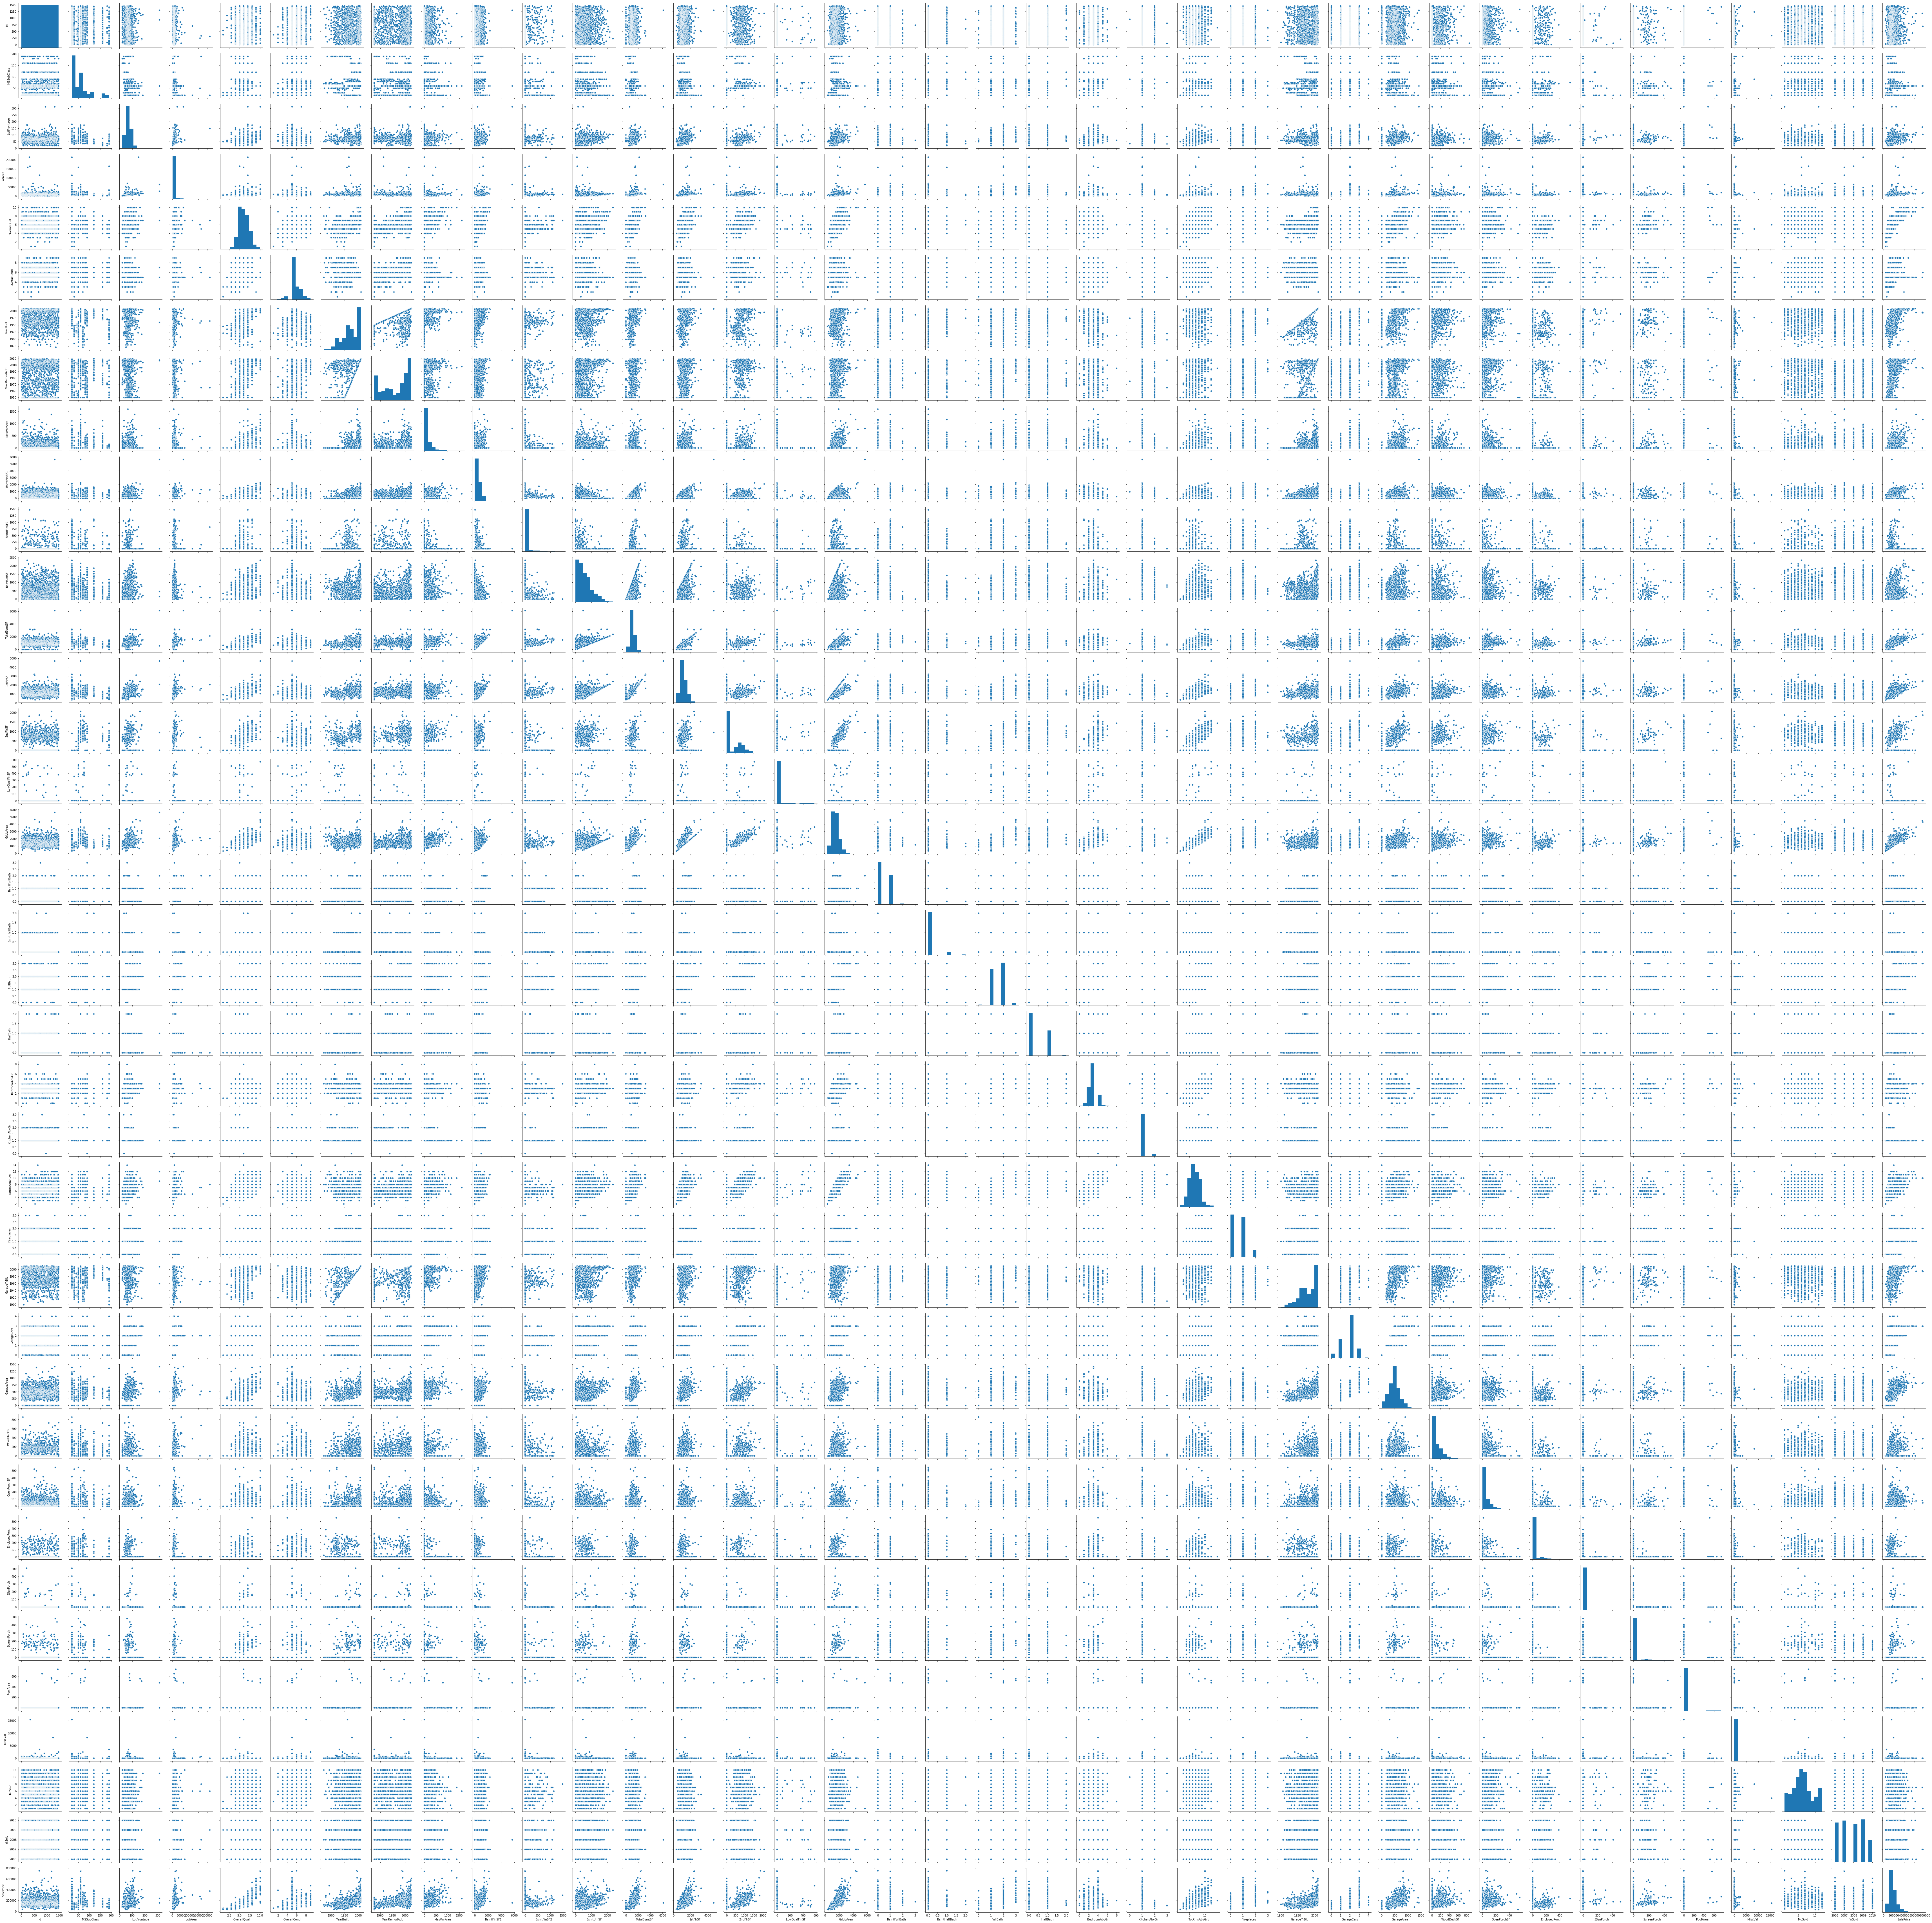

In [8]:
sns.pairplot(df)

## Check Corelation 

#### Heatmap helps to find the correlation between the variables. 

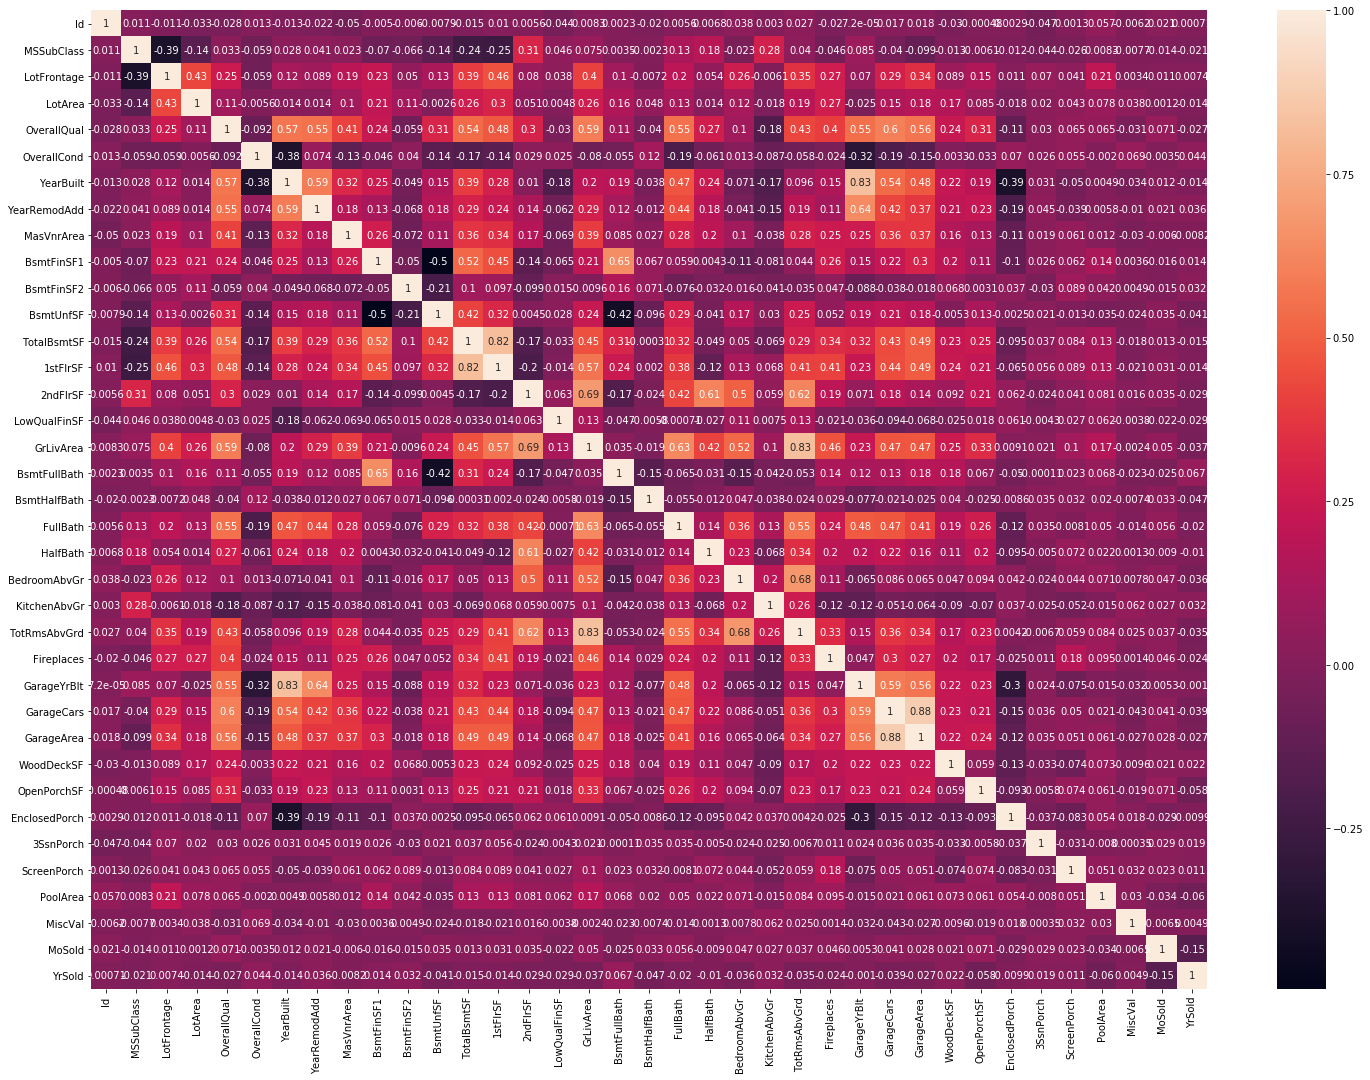

In [18]:
plt.figure(figsize=(25,18))
sns.heatmap(df.drop('SalePrice',axis=1).corr(),annot=True)

## Drop Corelated Features

In [0]:
abs_corr_matrix = df.drop('SalePrice',axis=1).corr().abs()

####  Select upper triangle of matrix

In [0]:
up_tri = abs_corr_matrix.where(np.triu(np.ones(abs_corr_matrix.shape),k=1).astype(np.bool))

In [21]:
up_tri.shape

(37, 37)

#### Features having corelation > 0.75 with other features

In [22]:
corr_features = [col for col in up_tri.columns if any(up_tri[col]) > 0.75]
print(corr_features)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


The above features are highly corelated and this would affect linear regression, hence it is necessary to remove these features

In [23]:
df = df.drop(corr_features,axis=1)
df.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [24]:
df.isnull().sum()[df.isnull().sum() > 0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [25]:
df['MiscFeature'].value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 44 columns):
MSZoning         1460 non-null object
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1423 non-null object
BsmtCond         1423 non-null object
BsmtExposure     1422

## Drop Columns having null values

In [0]:
df = df.dropna(axis=1)

In [28]:
df.shape

(1460, 28)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 28 columns):
MSZoning         1460 non-null object
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
Heating          1460 non-null object
HeatingQC        1460 non-null object
CentralAir       1460 non-null object
KitchenQual      1460 non-null object
Functional       14

In [31]:
df.describe(include='all')

MSZoning Street LotShape  ... SaleType SaleCondition      SalePrice
count      1460   1460     1460  ...     1460          1460    1460.000000
unique        5      2        4  ...        9             6            NaN
top          RL   Pave      Reg  ...       WD        Normal            NaN
freq       1151   1454      925  ...     1267          1198            NaN
mean        NaN    NaN      NaN  ...      NaN           NaN  180921.195890
std         NaN    NaN      NaN  ...      NaN           NaN   79442.502883
min         NaN    NaN      NaN  ...      NaN           NaN   34900.000000
25%         NaN    NaN      NaN  ...      NaN           NaN  129975.000000
50%         NaN    NaN      NaN  ...      NaN           NaN  163000.000000
75%         NaN    NaN      NaN  ...      NaN           NaN  214000.000000
max         NaN    NaN      NaN  ...      NaN           NaN  755000.000000

[11 rows x 28 columns]

## Regression: Step 3

Encoding Categorical Data to numbers

In [0]:
string_cols = [col for col in df.columns if df[col].dtypes =='object']

In [35]:
for i in string_cols:
  print('Column Name : ' + i + " Unique values : " ,df[i].unique())

Column Name : MSZoning Unique values :  ['RL' 'RM' 'C (all)' 'FV' 'RH']
Column Name : Street Unique values :  ['Pave' 'Grvl']
Column Name : LotShape Unique values :  ['Reg' 'IR1' 'IR2' 'IR3']
Column Name : LandContour Unique values :  ['Lvl' 'Bnk' 'Low' 'HLS']
Column Name : Utilities Unique values :  ['AllPub' 'NoSeWa']
Column Name : LotConfig Unique values :  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Column Name : LandSlope Unique values :  ['Gtl' 'Mod' 'Sev']
Column Name : Neighborhood Unique values :  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Column Name : Condition1 Unique values :  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Column Name : Condition2 Unique values :  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
Column Name : BldgType Unique v

In [0]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for i in string_cols:
  col = i + "_encode"
  df[col] = lb.fit_transform(df[i])

## Transformed Dataframe

In [38]:
df.head()

MSZoning Street  ... SaleType_encode SaleCondition_encode
0       RL   Pave  ...               8                    4
1       RL   Pave  ...               8                    4
2       RL   Pave  ...               8                    4
3       RL   Pave  ...               8                    0
4       RL   Pave  ...               8                    4

[5 rows x 55 columns]

In [0]:
features = [col for col in df.columns if col.endswith("_encode")]

In [42]:
features

['MSZoning_encode',
 'Street_encode',
 'LotShape_encode',
 'LandContour_encode',
 'Utilities_encode',
 'LotConfig_encode',
 'LandSlope_encode',
 'Neighborhood_encode',
 'Condition1_encode',
 'Condition2_encode',
 'BldgType_encode',
 'HouseStyle_encode',
 'RoofStyle_encode',
 'RoofMatl_encode',
 'Exterior1st_encode',
 'Exterior2nd_encode',
 'ExterQual_encode',
 'ExterCond_encode',
 'Foundation_encode',
 'Heating_encode',
 'HeatingQC_encode',
 'CentralAir_encode',
 'KitchenQual_encode',
 'Functional_encode',
 'PavedDrive_encode',
 'SaleType_encode',
 'SaleCondition_encode']

In [0]:
X = df[features]
Y = df['SalePrice']

## Regression: Step 4

 Feature scaling where we need to bring all the dataset in the same
scale so that no other variable will dominate any other variable.

In [0]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_scaled = sc_x.fit_transform(X)
sc_y = StandardScaler()
Y_scaled = sc_y.fit_transform(Y.values.reshape(-1,1))

## Regression: Step 4

split the data into Test and Train as it is supervised
learning. 

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,Y_scaled,test_size=0.2,random_state=1)

## Regression: Step 6

In [0]:
lr = LinearRegression()

#### Fit the train data on the model 


Fitting a model means that you are making your algorithm learn the relationship between
dependent and independent variables so that you can predict the future values of the outcome.

In [52]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Use test data to check the accuracy of the model


In [0]:
y_pred = lr.predict(X_test)

#### R square value will be used to measure the accuracy of the model

In [54]:
print("Variance Score {0:.2f}".format(r2_score(y_test,y_pred)))

Variance Score 0.51


#### Using Random Forest Regressor

In [0]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators =100)

In [59]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print("Variance Score {0:.2f}".format(r2_score(y_test,y_pred)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Variance Score 0.63
